# Example Tree

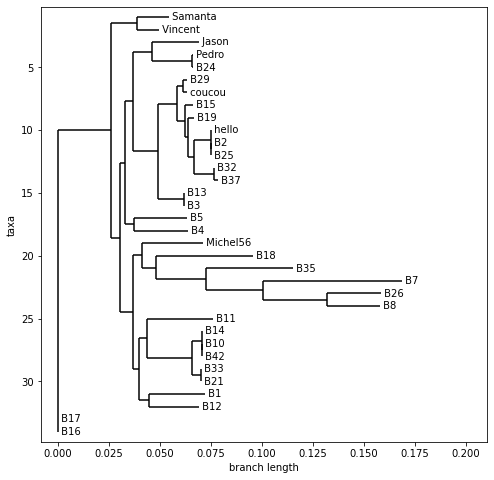

In [1]:
from Bio import Phylo
import matplotlib.pyplot as plt

t = Phylo.read('example.tree', 'newick')
plt.rcParams['figure.figsize'] = (8,8)
Phylo.draw(t)

In [2]:
!cat control.txt



OUTPUT= test  	    						# Output folder
TREE=  example.tree							# Tree file used for the simulations (nwk format)

# OPTIONS:

GC=45		  								# GC content (default = 50%)
LENGTH=50000								# Genome length (default = 10,000bp)
RESCALE= 0.1								# Tree rescaling coefficient (default = 1, no rescaling)
RHO=0.1        	 							# Recombination rate (default = 0, no recombination)
DELTA=  200									# Average recombination tract length (default = 100bp)
CODONS=0.2,0.1,0.7							# Mutation rate at codon positions (default = 0.33,0.33,0.33, uniform rates)
SUB_MODEL= K2P								# Substitution model: JC69, K2P, K3P or GTR (default= JC69, Jukes and Cantor)
KAPPA=1.1       							# Transition/transversion parameter for K2P model (default = 1). Can also be specified in SUB_RATE. 
#SEQUENCE= ref.fa							# Sequence file (fasta) with genome sequence to evolve (if provided, options GC and LENGTH become obsolete)
#SUB_RATE= 0.3,0.15,0.15,0.10,0.10,0.2		# Parameters of substitution model (JC

In [3]:
!python coresimul_master.py control.txt

Launching pipeline with Python 3
Snake= 3
loc=   coresimul_master.py
Usage:  python coresimul_master.py   control.txt


### Welcome! ###

Output folder already exists. Previous files will be lost.
1. Reading the tree
['Samanta', 'Vincent', 'Jason', 'Pedro', 'B24', 'B29', 'coucou', 'B15', 'B19', 'hello', 'B2', 'B25', 'B32', 'B37', 'B13', 'B3', 'B5', 'B4', 'Michel56', 'B18', 'B35', 'B7', 'B26', 'B8', 'B11', 'B14', 'B10', 'B42', 'B33', 'B21', 'B1', 'B12', 'B17', 'B16']
Found  34 taxa in the tree
2. Extracting branch lengths and topology
3. Simulating

################
PARAMETERS: 
OUTPUT=  test/
Alignment Length=  50000 bp
GC%=  45.0 % (default=50%)
Branch rescaling=  0.1  (default=1, no rescaling)
Transition/Transversion bias, Kappa=  1.1  (default=1, no bias)
CODONS Frequency=  0.2,0.1,0.7 
STARTING GENOME=  none
SUBSTITUTION MODEL=  K2P with rate(s)  none
GAIN_RATE= none
LOSS_RATE= none
MIN_DELTA= 1
################

USAGE:
['simulation.py', 'no', '1', 'none', 'none', 'K2P', 'none', 'n

In [4]:
!ls test

detail.txt	 genomes.fa  nu.txt	   renamed.txt	roots.txt
dichotomies.txt  names.txt   renamed.tree  rm.txt


In [5]:
!sed -i.bak -e 's/;;$/;/' test/renamed.tree

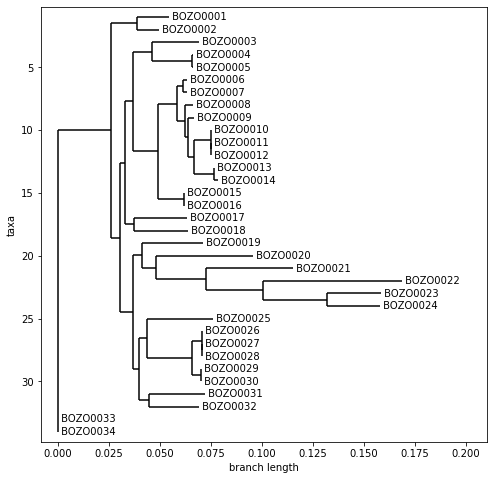

In [6]:
t = Phylo.read('test/renamed.tree', 'newick')
plt.rcParams['figure.figsize'] = (8,8)
Phylo.draw(t)

# Simulate reads

In [7]:
import os
import shutil

sequences_path = 'test/sequences'
reads_path = f'{sequences_path}/reads'

if os.path.exists(sequences_path):
    shutil.rmtree(sequences_path)
    
os.mkdir(sequences_path)
os.mkdir(reads_path)

In [8]:
from Bio import SeqIO

with open('test/genomes.fa', 'r') as f:
    for record in SeqIO.parse(f, 'fasta'):
        with open(f'test/sequences/{record.id}.fasta', 'w') as out:
            SeqIO.write(record, out, 'fasta')
            
!ls test/sequences

B1.fasta   B15.fasta  B21.fasta  B32.fasta  B5.fasta	    Samanta.fasta
B10.fasta  B16.fasta  B24.fasta  B33.fasta  B7.fasta	    Vincent.fasta
B11.fasta  B17.fasta  B25.fasta  B35.fasta  B8.fasta	    coucou.fasta
B12.fasta  B18.fasta  B26.fasta  B37.fasta  Jason.fasta     hello.fasta
B13.fasta  B19.fasta  B29.fasta  B4.fasta   Michel56.fasta  reads
B14.fasta  B2.fasta   B3.fasta	 B42.fasta  Pedro.fasta


In [9]:
filenames = [f for f in os.listdir(sequences_path) if f.endswith('.fasta')]
filepaths = [f'{sequences_path}/{f}' for f in filenames]
print(filepaths)

['test/sequences/B32.fasta', 'test/sequences/B1.fasta', 'test/sequences/B16.fasta', 'test/sequences/hello.fasta', 'test/sequences/B2.fasta', 'test/sequences/Michel56.fasta', 'test/sequences/B12.fasta', 'test/sequences/B7.fasta', 'test/sequences/Samanta.fasta', 'test/sequences/B33.fasta', 'test/sequences/B42.fasta', 'test/sequences/B29.fasta', 'test/sequences/Jason.fasta', 'test/sequences/B26.fasta', 'test/sequences/B21.fasta', 'test/sequences/B15.fasta', 'test/sequences/B37.fasta', 'test/sequences/Vincent.fasta', 'test/sequences/Pedro.fasta', 'test/sequences/B35.fasta', 'test/sequences/B8.fasta', 'test/sequences/coucou.fasta', 'test/sequences/B19.fasta', 'test/sequences/B11.fasta', 'test/sequences/B24.fasta', 'test/sequences/B25.fasta', 'test/sequences/B4.fasta', 'test/sequences/B14.fasta', 'test/sequences/B17.fasta', 'test/sequences/B3.fasta', 'test/sequences/B18.fasta', 'test/sequences/B5.fasta', 'test/sequences/B10.fasta', 'test/sequences/B13.fasta']


In [10]:
import hashlib

def seed(string: str, upper: int = 1000000) -> int:
    """
    Generates a seed value from the passed string by hashing (so it's reproducible).
    
    :param string: The string to generate the seed from.
    :param upper: The upper limit on the random values to generate.
    
    :return: A random integer from 0 to upper.
    """
    hash_bytes = hashlib.sha1(string.encode()).digest()
    return int.from_bytes(hash_bytes, byteorder='little') % upper

reference_name = 'B16.fasta'
reference_path = f'{sequences_path}/{reference_name}'
reference_path_abs = os.path.abspath(reference_path)

with open(f'{sequences_path}/snippy.fofn', 'w') as snippy_fofn:
    for file in filenames:
        if file == reference_name:
            print(f'Skipping reference file {file}')
            continue
        
        filepath = f'{sequences_path}/{file}'
        name = os.path.splitext(file)[0]

        readspath_abs = os.path.abspath(reads_path)
        print(f'Working on {name}')
        snippy_fofn.write(f'{name}\t{readspath_abs}/{name}_1.fq\t{readspath_abs}/{name}_2.fq\n')
        !art_illumina --paired -f 50 -l 250 -m 550 -s 100 -na -o {reads_path}/{name}_ -rs {seed(name)} --in {filepath} > {reads_path}/{name}.log 2>&1

Working on B32
Working on B1
Skipping reference file B16.fasta
Working on hello
Working on B2
Working on Michel56
Working on B12
Working on B7
Working on Samanta
Working on B33
Working on B42
Working on B29
Working on Jason
Working on B26
Working on B21
Working on B15
Working on B37
Working on Vincent
Working on Pedro
Working on B35
Working on B8
Working on coucou
Working on B19
Working on B11
Working on B24
Working on B25
Working on B4
Working on B14
Working on B17
Working on B3
Working on B18
Working on B5
Working on B10
Working on B13


In [11]:
!head -n 2 test/sequences/snippy.fofn

B32	/home/apetkau/workspace/CoreSimul/test/sequences/reads/B32_1.fq	/home/apetkau/workspace/CoreSimul/test/sequences/reads/B32_2.fq
B1	/home/apetkau/workspace/CoreSimul/test/sequences/reads/B1_1.fq	/home/apetkau/workspace/CoreSimul/test/sequences/reads/B1_2.fq


# Build alignment

In [12]:
!conda run --name snippy snippy --version 2>/dev/null

snippy 4.6.0



In [13]:
!conda run --name snippy snippy-multi {sequences_path}/snippy.fofn --ref {reference_path_abs} --cpus 2 > {sequences_path}/snippy-commands.sh

perl: warning: Setting locale failed.
perl: warning: Please check that your locale settings:
	LANGUAGE = "en.UTF-8",
	LC_ALL = (unset),
	LC_CTYPE = "C.UTF-8",
	LANG = "en.UTF-8"
    are supported and installed on your system.
perl: warning: Falling back to the standard locale ("C").
Reading: test/sequences/snippy.fofn
Generating output commands for 33 isolates
Done.



In [14]:
!head -n 2 {sequences_path}/snippy-commands.sh

snippy --outdir 'B32' --R1 '/home/apetkau/workspace/CoreSimul/test/sequences/reads/B32_1.fq' --R2 '/home/apetkau/workspace/CoreSimul/test/sequences/reads/B32_2.fq' --ref /home/apetkau/workspace/CoreSimul/test/sequences/B16.fasta --cpus 2
snippy --outdir 'B1' --R1 '/home/apetkau/workspace/CoreSimul/test/sequences/reads/B1_1.fq' --R2 '/home/apetkau/workspace/CoreSimul/test/sequences/reads/B1_2.fq' --ref /home/apetkau/workspace/CoreSimul/test/sequences/B16.fasta --cpus 2


In [15]:
abs_sequences_path = os.path.abspath(sequences_path)
abs_snippy_commands = os.path.abspath(f'{sequences_path}/snippy-commands.sh')
!(pushd {abs_sequences_path} && conda run --name snippy bash {abs_snippy_commands} && popd) > {abs_sequences_path}/snippy.log 2>&1

In [16]:
!tail {abs_sequences_path}/snippy.log

Opening: core.tab
Opening: core.vcf
Processing contig: B16
Generating core.full.aln
Creating TSV file: core.txt
Running: snp-sites -c -o core.aln core.full.aln
This analysis is totally hard-core!
Done.

~/workspace/CoreSimul


In [17]:
!column -s$'\t' -t {abs_sequences_path}/core.txt

ID         LENGTH  ALIGNED  UNALIGNED  VARIANT  HET  MASKED  LOWCOV
B1         50000   49773    16         486      10   0       201
B10        50000   49847    4          465      13   0       136
B11        50000   49750    8          526      11   0       231
B12        50000   49796    36         395      7    0       161
B13        50000   49822    16         300      6    0       156
B14        50000   49831    16         466      8    0       145
B15        50000   49849    7          354      8    0       136
B17        50000   49815    30         1        6    0       149
B18        50000   49815    24         687      16   0       145
B19        50000   49820    37         348      12   0       131
B2         50000   49731    54         476      11   0       204
B21        50000   49785    10         430      13   0       192
B24        50000   49774    4          361      13   0       209
B25        50000   49784    47         478      14   0       155
B26        50000   498

# Build tree

In [20]:
reference_name_no_ext = os.path.splitext(reference_name)[0]
reference_name_no_ext

'B16'

In [23]:
!sed -i.bak -e 's/Reference/{reference_name_no_ext}/' {sequences_path}/core.aln

In [24]:
!iqtree -s {sequences_path}/core.aln

IQ-TREE multicore version 2.0.3 for Linux 64-bit built Dec 20 2020
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    PHAC5023362 (AVX512, FMA3, 12 GB RAM)
Command: iqtree -s test/sequences/core.aln
Seed:    175128 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Sat Jan 16 12:42:35 2021
Kernel:  AVX+FMA - 1 threads (8 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 8 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file test/sequences/core.aln ... Fasta format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 34 sequences with 5412 columns, 1162 distinct patterns
2337 parsimony-informative, 3075 singleton sites, 0 constant sites
          Gap/Ambiguity  Composition  p-value
   1  B1          0.00%    passed     89.51%
   2  B10         0.00%    passed     94.15%
   3  B11     

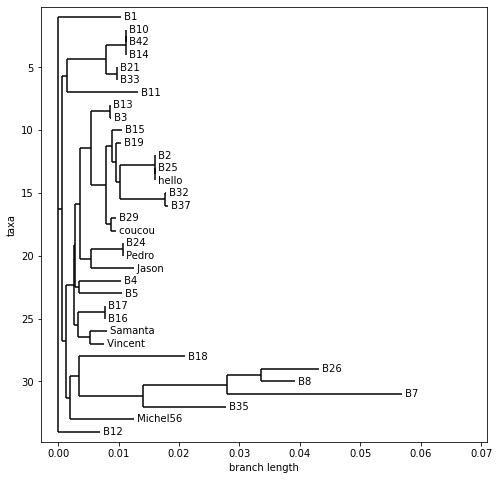

In [26]:
t = Phylo.read(f'{sequences_path}/core.aln.treefile', 'newick')
plt.rcParams['figure.figsize'] = (8,8)
Phylo.draw(t)